In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
# Load the data
df = pd.read_csv('Resources/medallists.csv')

# Display
df.head()

,medal_date,medal_type,medal_code,name,gender,country,country_code,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code
0,2024-07-27,Gold Medal,1,EVENEPOEL Remco,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136
1,2024-07-27,Silver Medal,2,GANNA Filippo,Male,Italy,ITA,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520
2,2024-07-27,Bronze Medal,3,van AERT Wout,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147
3,2024-07-27,Gold Medal,1,BROWN Grace,Female,Australia,AUS,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173
4,2024-07-27,Silver Medal,2,HENDERSON Anna,Female,Great Britain,GBR,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525


In [17]:
# Filter by medal
gold_medals = df[df['medal_type'] == 'Gold Medal']
silver_medals = df[df['medal_type'] == 'Silver Medal']
bronze_medals = df[df['medal_type'] == 'Bronze Medal']



<Figure size 1200x800 with 0 Axes>

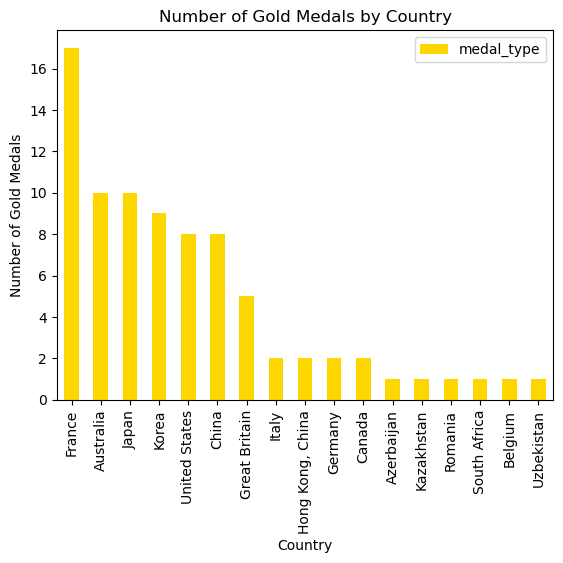

In [21]:
# Group by 'Country' and count the number of Gold medals
gold_medal_counts = gold_medals.groupby('country')['medal_type'].count().sort_values(ascending=False)

# Convert to Data Frame
gold_medal_counts = pd.DataFrame(gold_medal_counts)

# Plot the bar chart
plt.figure(figsize=(12, 8))
gold_medal_counts.plot(kind='bar', color='gold')
plt.title('Number of Gold Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=90)
plt.show()